In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

In [3]:
df = pd.read_csv(r"data.csv")
df['sentiment'].value_counts()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [3]:
df.shape

(101, 6)

In [4]:
df.head()

,date/time,text,sentiment,Date,Time,len
0,2023-03-07 23:56:47+00:00,👀✈️🔊\nVT-ALJ \n#AIC102 \n#Air India \n#India\n...,Neutral,2023-03-07,23:56:47,21
1,2023-03-07 23:41:06+00:00,👀✈️🔊\nVT-ALJ \n#AIC102 \n#Air India \n#India\n...,Neutral,2023-03-07,23:41:06,21
2,2023-03-07 23:35:51+00:00,@DrakesShooter I have no idea what you're talk...,Neutral,2023-03-07,23:35:51,24
3,2023-03-07 23:26:49+00:00,"@khabri_lal Because, as most overseas commenta...",Negative,2023-03-07,23:26:49,48
4,2023-03-07 22:35:03+00:00,Air India CEO calls for concerted efforts to c...,Neutral,2023-03-07,22:35:03,21


In [5]:
df['Date'].value_counts()

2023-03-07    101
Name: Date, dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

In [7]:
byday = df.groupby(df['Date'].dt.day_name(), sort=False).mean()
byday = byday.iloc[:, :1]
byday

,len
Date,
Tuesday,28.455446


c:\Users\sahas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


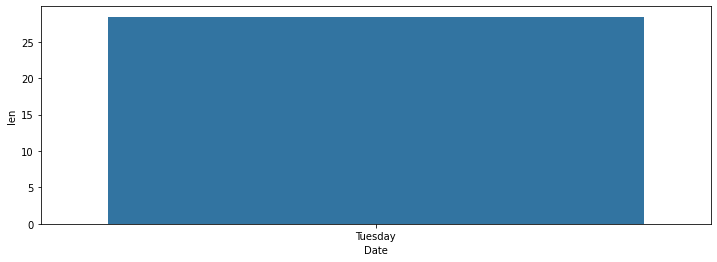

In [8]:
plt.figure(figsize=(12, 4))
bar = sns.barplot(byday.index, 'len', data=byday)
plt.show()

In [9]:
fig = px.histogram(df, x='len', color='sentiment')

fig.show()

In [14]:
#pip install WordCloud
from wordcloud import WordCloud, STOPWORDS

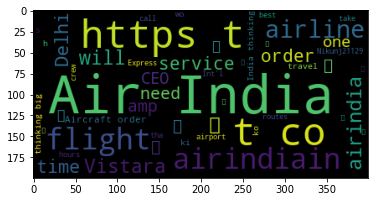

In [20]:
combined_tweets = " ".join([tweet for tweet in df.text])
                          
# Initialize wordcloud object
wc = WordCloud(background_color='black', 
                max_words=50, 
                stopwords = STOPWORDS)

plt.imshow(wc.generate(combined_tweets))